In [ ]:
from google.colab import drive
drive.mount('/content/mydrive')

Mounted at /content/mydrive


In [ ]:
#import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

In [ ]:
#load the data set using pandas
df = pd.read_csv('/content/Heart Attack.csv')

In [ ]:
df.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [ ]:
df.tail()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
1314,44,1,94,122,67,204.0,1.63,0.006,negative
1315,66,1,84,125,55,149.0,1.33,0.172,positive
1316,45,1,85,168,104,96.0,1.24,4.250,positive
1317,54,1,58,117,68,443.0,5.80,0.359,positive
1318,51,1,94,157,79,134.0,50.89,1.770,positive


In [ ]:
df.shape

(1319, 9)

In [ ]:
df.columns

Index(['age', 'gender', 'impluse', 'pressurehight', 'pressurelow', 'glucose',
       'kcm', 'troponin', 'class'],
      dtype='object')

In [ ]:
#to analyse some info about the data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1319 non-null   int64  
 1   gender         1319 non-null   int64  
 2   impluse        1319 non-null   int64  
 3   pressurehight  1319 non-null   int64  
 4   pressurelow    1319 non-null   int64  
 5   glucose        1319 non-null   float64
 6   kcm            1319 non-null   float64
 7   troponin       1319 non-null   float64
 8   class          1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


#we will check some statistical measures of the data

In [ ]:
df.describe()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


### now we will check how many people are having the disease and how many people are not having the disease. In this scenario 1 == Defective Heart   0 == Healthy Heart

In [ ]:
#In this data set the target columns will represents the person is having the healthy heart or not.
import pandas as pd
df = pd.read_csv('/content/Heart Attack.csv')

# Now you can check the value counts of the class column
df['class'].value_counts()

positive    810
negative    509
Name: class, dtype: int64

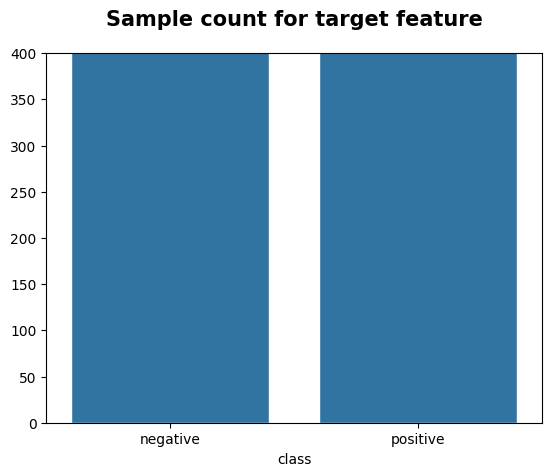

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plot= sns.countplot(data= df, x= "class",
              edgecolor="1", linewidth=1)
for bar in plot.patches:
    plot.annotate(format(bar.get_height(), '.0f'),
        (bar.get_x() + bar.get_width() / 2,
        bar.get_height()), ha='center', va='center',
        size=10, xytext=(0, 10),
        textcoords='offset points')
plt.ylim(0, 400)
plt.title("Sample count for target feature", fontsize=15, fontweight= "bold", pad= 20)
plt.ylabel("")
plt.show()

In [ ]:
X= df.drop(["class"], axis= "columns")
y= df["class"]
y= y.map({"positive": 1, "negative": 0})
X.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin
0,64,1,66,160,83,160.0,1.80,0.012
1,21,1,94,98,46,296.0,6.75,1.060
2,55,1,64,160,77,270.0,1.99,0.003
3,64,1,70,120,55,270.0,13.87,0.122
4,55,1,64,112,65,300.0,1.08,0.003


In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size= 0.2, random_state= 42)

In [ ]:
#Splitting the features and the target by train_test_split
X = df.drop(columns='class', axis=1)
Y = df['class']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(X_train)
X_train_scaled= scaler.transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# 5 folds selected
kfold = KFold(n_splits=10, random_state=0, shuffle=True)
model = SVC(probability=True)
results = cross_val_score(model, X_train_scaled, y_train, cv=kfold)
print(results)
# Output the accuracy. Calculate the mean and std across all folds.
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.68867925 0.70754717 0.71698113 0.70754717 0.78301887 0.66666667
 0.76190476 0.72380952 0.82857143 0.77142857]
Accuracy: 73.562% (4.678%)


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'tol': [1e-1,1e-2,1e-3, 1e-4, 1e-5],
              'C': [1,1.1,1.5,1.7,1.8]
              }
grid = GridSearchCV(model,param_grid, refit = True, verbose = 3)
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ......................C=1, tol=0.1;, score=0.711 total time=   0.1s
[CV 2/5] END ......................C=1, tol=0.1;, score=0.725 total time=   0.1s
[CV 3/5] END ......................C=1, tol=0.1;, score=0.730 total time=   0.1s
[CV 4/5] END ......................C=1, tol=0.1;, score=0.754 total time=   0.1s
[CV 5/5] END ......................C=1, tol=0.1;, score=0.758 total time=   0.1s
[CV 1/5] END .....................C=1, tol=0.01;, score=0.706 total time=   0.1s
[CV 2/5] END .....................C=1, tol=0.01;, score=0.730 total time=   0.1s
[CV 3/5] END .....................C=1, tol=0.01;, score=0.725 total time=   0.1s
[CV 4/5] END .....................C=1, tol=0.01;, score=0.763 total time=   0.1s
[CV 5/5] END .....................C=1, tol=0.01;, score=0.754 total time=   0.1s
[CV 1/5] END ....................C=1, tol=0.001;, score=0.706 total time=   0.1s
[CV 2/5] END ....................C=1, tol=0.001

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [1, 1.1, 1.5, 1.7, 1.8],
                         'tol': [0.1, 0.01, 0.001, 0.0001, 1e-05]},
             verbose=3)

In [ ]:
# Print the best hyperparameters and best score
print("Best Hyperparameters: ", grid.best_params_)
print("Best Score: ", grid.best_score_)

Best Hyperparameters:  {'C': 1.8, 'tol': 0.01}
Best Score:  0.7563981042654029


In [ ]:
X

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin
0,64,1,66,160,83,160.0,1.80,0.012
1,21,1,94,98,46,296.0,6.75,1.060
2,55,1,64,160,77,270.0,1.99,0.003
3,64,1,70,120,55,270.0,13.87,0.122
4,55,1,64,112,65,300.0,1.08,0.003
...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006
1315,66,1,84,125,55,149.0,1.33,0.172
1316,45,1,85,168,104,96.0,1.24,4.250
1317,54,1,58,117,68,443.0,5.80,0.359


In [ ]:
Y

0       negative
1       positive
2       negative
3       positive
4       negative
          ...   
1314    negative
1315    positive
1316    positive
1317    positive
1318    positive
Name: class, Length: 1319, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming you have your features (X) and target variable (Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [ ]:
X_test.shape

(264, 8)

In [ ]:
X.shape

(1319, 8)

In [ ]:
print(X_train.shape)
print(Y_train.shape)


(1055, 8)
(1055,)


# Training the Model Using Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Assuming X_train is a DataFrame and has feature names
model = LogisticRegression()
model.fit(X_train, Y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Model Evaluation For Logistic Regression Using Accuracy Score

In [ ]:
# accuracy on training data
from sklearn.metrics import accuracy_score
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy on Training data using Logistic Regression : ', training_data_accuracy*100)

Accuracy on Training data using Logistic Regression :  81.99052132701422


In [ ]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy on Test data using Logistice Regression : ', test_data_accuracy*100)

Accuracy on Test data using Logistice Regression :  79.92424242424242


# Training the Model using Support Vector Machine

In [ ]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', gamma=0.1, C=1.0)

svm_model.fit(X_train, Y_train)

SVC(gamma=0.1)

# Model Evaluation For Support Vector Machine Using Accuracy Score

In [ ]:
X_train_prediction4 = svm_model.predict(X_train)
training_data_accuracy4 = accuracy_score(X_train_prediction4, Y_train)
print('Accuracy on Training data using Support Vector Machine : ', training_data_accuracy4*100)

Accuracy on Training data using Support Vector Machine :  100.0


In [ ]:
X_test_prediction4 = svm_model.predict(X_test)
test_data_accuracy4 = accuracy_score(X_test_prediction4, Y_test)

In [ ]:
print('Accuracy on Test data using Support Vector Machine : ', test_data_accuracy4*100)

Accuracy on Test data using Support Vector Machine :  62.121212121212125


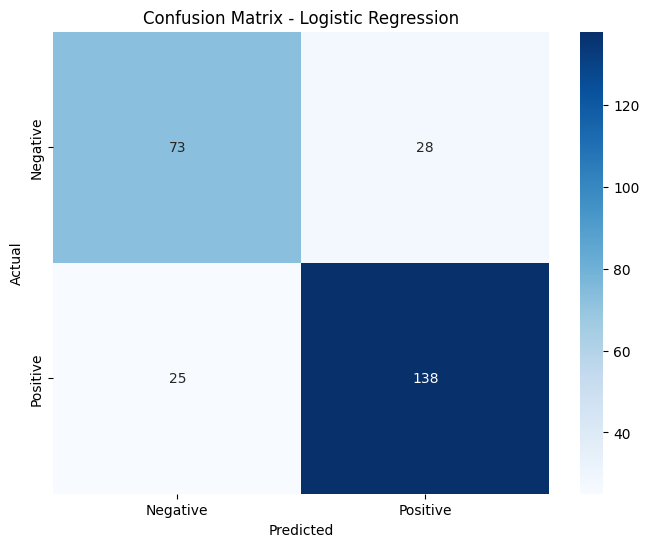

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Logistic Regression
y_pred_lr = model.predict(X_test)
cm_lr = confusion_matrix(Y_test, y_pred_lr)

# Plot Confusion Matrix for Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

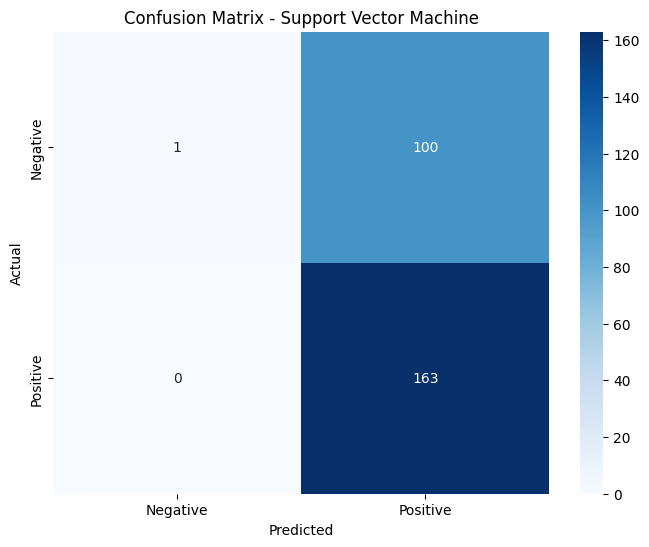

In [ ]:
# Support Vector Machine
y_pred_svm = svm_model.predict(X_test)
cm_svm = confusion_matrix(Y_test, y_pred_svm)


# Plot Confusion Matrix for Support Vector Machine
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix - Support Vector Machine')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


AUC: 0.9295675962237975


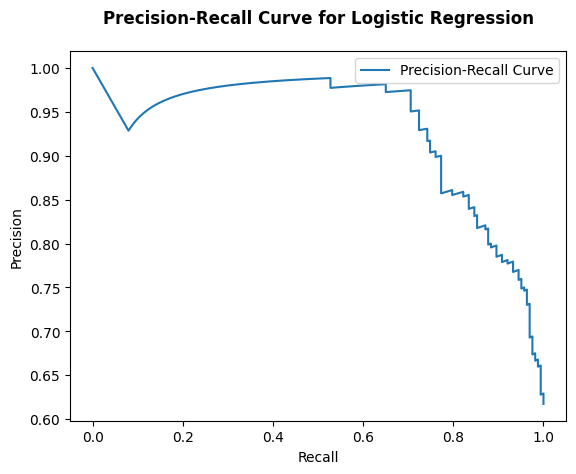

In [ ]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Assuming you have the model and test data
# Replace 'model' and 'X_test' with your actual model and test data variables

# Logistic Regression
y_proba = model.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
# Plot Precision-Recall Curve for Logistic Regression

auc_score = auc(recall, precision)
print("AUC:", auc_score)
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Logistic Regression',pad= 20, fontweight= "bold")
plt.legend()
plt.show()


# Comparing the Accuracy Scores of All Models

In [ ]:

#Creating Data Frame for the accuracy score of logistic regression.

results_df = pd.DataFrame(data=[["Logistic Regression", training_data_accuracy*100, test_data_accuracy*100]],
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])

#Creating Data Frame for the accuracy score of Support Vector Machine.

results_df_4 = pd.DataFrame(data=[["Support Vector Machine",training_data_accuracy4*100, test_data_accuracy4*100]],
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_4, ignore_index=True)

#The Final Data Frame of the accuracy score of all results.

results_df

<ipython-input-38-c81d9b9d0b7e>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_4, ignore_index=True)


,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,81.990521,79.924242
1,Support Vector Machine,100.000000,62.121212


## So by Analysing the above table We can easily guess that Logistic Regression is Performing a well Training and Testing accuracy Score. So we will Continue Predicting the new Data with Logistic Regression Model.

In [ ]:
# values of a person heart scan
input_data = (64, 1, 66, 160, 83, 160, 1.8, 0.012)

# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Check feature names order
feature_names_order = X.columns.tolist()

# Make sure the order of features in the input matches the order during training
input_data_df = pd.DataFrame(input_data_reshaped, columns=feature_names_order)

prediction = model.predict(input_data_df)

if prediction[0] == 'negative':
    print('According to the given details, the person does not have a Heart Disease')
else:
    print('According to the given details, the person has Heart Disease')


According to the given details, the person does not have a Heart Disease


In [ ]:
# values of a person heart scan
input_data = (64,1,70,20,55,20,13.87,0.122)

# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Check feature names order
feature_names_order = X.columns.tolist()

# Make sure the order of features in the input matches the order during training
input_data_df = pd.DataFrame(input_data_reshaped, columns=feature_names_order)

prediction = model.predict(input_data_df)

if prediction[0] == 'negative':
    print('According to the given details, the person does not have a Heart Disease')
else:
    print('According to the given details, the person has Heart Disease')


According to the given details, the person has Heart Disease


In [ ]:
import pickle


In [ ]:
with open('HeartAttackPredict.pkl', 'wb') as file:
  pickle.dump(model, file)

In [ ]:
with open('heartattack.pkl', 'rb') as file:
  loaded_model = pickle.load(file)

FileNotFoundError: [Errno 2] No such file or directory: 'heartattack.pkl'

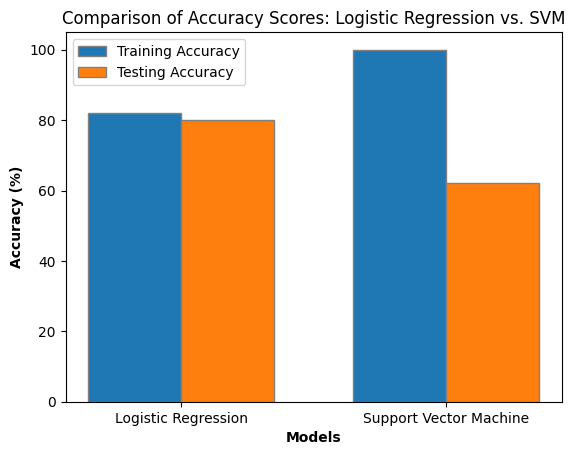

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have results_df DataFrame with accuracy scores
labels = results_df['Model']
training_accuracy = results_df['Training Accuracy %']
testing_accuracy = results_df['Testing Accuracy %']

# Bar width
bar_width = 0.35

# Create bar positions
r1 = range(len(labels))
r2 = [x + bar_width for x in r1]

# Create training accuracy bars
plt.bar(r1, training_accuracy, width=bar_width, edgecolor='grey', label='Training Accuracy')

# Create testing accuracy bars
plt.bar(r2, testing_accuracy, width=bar_width, edgecolor='grey', label='Testing Accuracy')

# Add labels, title, and legend
plt.xlabel('Models', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(labels))], labels)
plt.ylabel('Accuracy (%)', fontweight='bold')
plt.title('Comparison of Accuracy Scores: Logistic Regression vs. SVM')
plt.legend()

# Show the graph
plt.show()
